<a href="https://colab.research.google.com/github/rodrigobsouza17/Machine-Learning/blob/main/MVP_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP da Sprint de Machine Learning & Analytics**

# **Introdução:**

Este projeto versará sobre ter um maior balizamento em relação à possibilidade de se prever os resultados dos jogos dos times participantes do Campeonato Brasileiro de Futebol.
A base de dados que será utlizada para a execução do teste provém do site Football Data, o qual trabalha realizando apostas esportivas mas que também agrega resultados de vários campeonatos ao redor do mundo. Teremos como referência os resultados dos jogos dos Campeonatos Brasileiros desde o ano de 2012 até o dia 08/11/2024.

# **Desenvolvimento:**

**1º Passo: Fazendo as importações necessárias para a execução do Modelo:**

In [ ]:
# Configuração para não exibir os warnings:
import warnings
warnings.filterwarnings('ignore')

# Imports necessários:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from IPython.display import display
%matplotlib inline

**2º Passo: Carga do Dataset:**

In [ ]:
url = 'https://raw.githubusercontent.com/rodrigobsouza17/Machine-Learning/main/BRA_V2.csv' # Repositório onde o dataset está armazenado
dataset = pd.read_csv (url, delimiter = ',') # Carga do dataset propriamente dita
dataset.head () # Visualização das primeiras linhas do dataset carregado

# Legenda das colunas:
# . Country - País do campeonato
# . League - Nome do campeonato
# . Date - Data do jogo
# . Time - Hora do jogo (Horário do Reino Unido - Lembrando que a Base de Dados é inglesa)
# . Home - Time da casa (mandante)
# . Away - Time visitante
# . HG - Gols do time mandante
# . AG - Gols do time visitante
# . Res - Resultado do jogo (0 - Empate ; 1 - Vitória do time mandante ; 2 - Vitória do time visitante)
# . Demais colunas - Referem-se a odds (probabilidades dos eventos acontecerem) provenientes do site, afinal é um site de apostas

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,0.0,...,5.25,1.76,3.87,5.31,1.69,3.50,4.90,0.0,0.0,0.0
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,0.0,...,2.68,2.83,3.42,2.70,2.59,3.23,2.58,0.0,0.0,0.0
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,1.0,...,6.72,1.67,4.05,7.22,1.59,3.67,5.64,0.0,0.0,0.0
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,1.0,...,3.15,2.49,3.39,3.15,2.35,3.26,2.84,0.0,0.0,0.0
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,2.0,...,4.41,1.96,3.53,4.41,1.89,3.33,3.89,0.0,0.0,0.0


**3º Passo:**

a) Organização e Exploração dos dados:

In [ ]:
matches = dataset.shape[0] # Quantidade de jogos
features = dataset.shape[1] # Quantidade de features (colunas) - Entradas
# Criação de uma variável home_win para quantificar as vitórias do time mandante
home_win = dataset[dataset['Res'] == 1].shape[0]
# Criação de uma variável away_win para quantificar as vitórias do time visitante
away_win = dataset[dataset['Res'] == 2].shape[0]
# Criação de uma variável draw para quantificar os empates
draw = dataset[dataset['Res'] == 0].shape[0]
# Criação de uma variável win_rate para ter uma medida de proporção das vitórias dos times mandantes:
win_rate = round((home_win / matches) * 100, 2)
# Exibindo os resultados:
print(f'Total de jogos: {matches}')
print(f'Total de colunas: {features}')
print(f'Vitórias do time mandante: {home_win}')
print(f'Vitórias do time visitante: {away_win}')
print(f'Empates: {draw}')
print(f'Percentual de vitórias do time mandante: {win_rate}%')

Total de jogos: 4879
Total de colunas: 22
Vitórias do time mandante: 2367
Vitórias do time visitante: 1201
Empates: 1311
Percentual de vitórias do time mandante: 48.51%


b) Visualizando as informações acima através de gráfico:

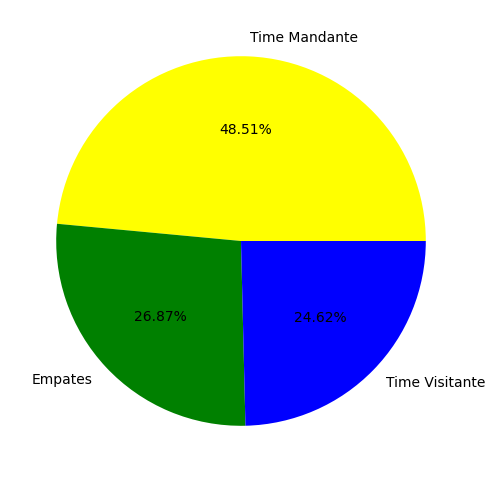

In [ ]:
labels = ['Time Mandante', 'Empates', 'Time Visitante'] # Títulos dos atributos a serem exibidos no gráfico
colors = ['Yellow', 'Green', 'Blue'] # Legenda das cores a serem plotadas para cada atributo no gráfico
values = [home_win, draw, away_win] # Percentual calculado anteriormente para cada categoria dentro do gráfico
fig = plt.figure(figsize=(6, 6)) # Tamanho da figura
plt.pie(values, labels=labels, colors=colors, autopct='%.2f%%') # Gráfico em formato de pizza com os percentuais calculados
plt.show() # Para exibir o gráfico

Pelo gráfico acima, à primeira vista, vale a pena apostar no time que é mandante haja vista que eles ganham quase que 50% dos jogos. Ou seja, o fator casa é muito importante a ser considerado na análise.

**4º Passo: Preparação dos dados**

In [ ]:
# Deixando somente as colunas com dados numéricos relevantes para se fazer a análise:
num_data = dataset.drop(['Season', 'Country', 'League', 'Date', 'Time', 'Home', 'Away'], axis=1) # Tirando as colunas que não possuem dados numéricos
display(num_data.head()) # Para mostrar somente os dados numéricos após o "corte"

,HG,AG,Res,PSCH,PSCD,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
0,1.0,1.0,0.0,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90,0.0,0.0,0.0
1,1.0,1.0,0.0,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58,0.0,0.0,0.0
2,2.0,1.0,1.0,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64,0.0,0.0,0.0
3,4.0,2.0,1.0,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84,0.0,0.0,0.0
4,0.0,1.0,2.0,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89,0.0,0.0,0.0


In [ ]:
# Separação, de fato, das features (entradas) e labels (saídas):
features_drop = num_data.drop('Res', axis = 1) # Todas as colunas menos a coluna do Resultado
target = num_data ['Res'] # Somente a coluna do Resultado
print (f'Features:\n {features_drop.head()}') # Mostrando as primeiras linhas das features
print (f'=======================================================================') # Apenas para facilitar a visualização
print (f'Labels:\n {target.head()}') # Mostrando as primeiras linhas do label


Features:
     HG   AG  PSCH  PSCD  PSCA  MaxCH  MaxCD  MaxCA  AvgCH  AvgCD  AvgCA  \
0  1.0  1.0  1.75  3.86  5.25   1.76   3.87   5.31   1.69   3.50   4.90   
1  1.0  1.0  2.83  3.39  2.68   2.83   3.42   2.70   2.59   3.23   2.58   
2  2.0  1.0  1.60  4.04  6.72   1.67   4.05   7.22   1.59   3.67   5.64   
3  4.0  2.0  2.49  3.35  3.15   2.49   3.39   3.15   2.35   3.26   2.84   
4  0.0  1.0  1.96  3.53  4.41   1.96   3.53   4.41   1.89   3.33   3.89   

   BFECH  BFECD  BFECA  
0    0.0    0.0    0.0  
1    0.0    0.0    0.0  
2    0.0    0.0    0.0  
3    0.0    0.0    0.0  
4    0.0    0.0    0.0  
Labels:
 0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Res, dtype: float64


In [ ]:
# Feature Selection: (Seleção de características)
# Iremos fazer uma seleção das features através da ferramenta K-Best:
features_list = [features_drop] # Lista das Entradas
k_best_features = SelectKBest(k='all') # Seleção do K
k_best_features.fit_transform(features_drop, target) # Aplicação do K-Best
k_best_features_scores = k_best_features.scores_ # Lista dos scores de cada feature
raw_pairs = zip(features_drop.columns, k_best_features_scores) # Lista de tuplas com os scores
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1]))) # Lista de tuplas com os scores em ordem decrescente
k_best_features_final = dict (ordered_pairs[:15]) # Dicionário com as melhores features
k_best_features_final_end = list (k_best_features_final.keys()) # Lista com as melhores features
print (f'Melhores Features: \n', k_best_features_final_end) # Mostrando as melhores features
print (f'======================================================================================================================') # Apenas para facilitar a visualização
print (f'Quantidade de Melhores Features: {len(k_best_features_final_end)}') # Mostrando a quantidade de melhores features
print (f'======================================================================================================================')
print (f'Scores respectivos de cada Feature: \n', k_best_features_scores) # Mostrando os scores de cada feature


Melhores Features: 
 ['HG', 'AG', 'PSCH', 'AvgCH', 'AvgCA', 'MaxCH', 'PSCA', 'MaxCA', 'MaxCD', 'AvgCD', 'PSCD', 'BFECA', 'BFECH', 'BFECD']
Quantidade de Melhores Features: 14
Scores respectivos de cada Feature: 
 [1.61711858e+03 1.58382739e+03 2.10316097e+02 9.33896472e+01
 1.84815090e+02 1.87472856e+02 9.60570446e+01 1.81732431e+02
 2.06202919e+02 9.50948169e+01 1.92100846e+02 1.09644634e+00
 2.86957289e-01 1.82935212e+00]


In [ ]:
# Com o resultado dos scores acima, iremos retirar os 3 piores resultados que não performaram tão bem
features_drop = num_data.drop (['Res', 'BFECA', 'BFECH', 'BFECD'], axis = 1) # Retirando as colunas com os piores resultados além da coluna Resultado, que será o Label
# Label de treinamento:
target = num_data ['Res'] # Somente a coluna do Resultado
print (f'Features:\n {features_drop.head()}') # Mostrando as primeiras linhas das features
print (f'=======================================================================') # Apenas para facilitar a visualização
print (f'Labels:\n {target.head()}') # Mostrando as primeiras linhas do label


Features:
     HG   AG  PSCH  PSCD  PSCA  MaxCH  MaxCD  MaxCA  AvgCH  AvgCD  AvgCA
0  1.0  1.0  1.75  3.86  5.25   1.76   3.87   5.31   1.69   3.50   4.90
1  1.0  1.0  2.83  3.39  2.68   2.83   3.42   2.70   2.59   3.23   2.58
2  2.0  1.0  1.60  4.04  6.72   1.67   4.05   7.22   1.59   3.67   5.64
3  4.0  2.0  2.49  3.35  3.15   2.49   3.39   3.15   2.35   3.26   2.84
4  0.0  1.0  1.96  3.53  4.41   1.96   3.53   4.41   1.89   3.33   3.89
Labels:
 0    0.0
1    0.0
2    1.0
3    1.0
4    2.0
Name: Res, dtype: float64


In [ ]:
# Normalização dos dados:
# Esta é uma parte importante, pois o modelo pode considerar que uma vitória, por exemplo, de 7 a 1 seja melhor do que 1 a 0
# E não é isso que queremos na verdade. Apenas queremos efetuar a classificação, ou seja, vitórias, empates e derrotas
# Gerando o novo padrão:

scaler = MinMaxScaler().fit (features_drop)
features_scale = scaler.transform (features_drop)
print (f'Features:\n {features_scale.shape}')
print (f'========================================================================')
print (features_scale)


Features:
 (4879, 11)
[[0.14285714 0.16666667 0.0989819  ... 0.03235908 0.11913357 0.14746363]
 [0.14285714 0.16666667 0.16006787 ... 0.07933194 0.0866426  0.0562328 ]
 [0.28571429 0.16666667 0.09049774 ... 0.02713987 0.13959085 0.17656311]
 ...
 [0.28571429 0.         0.07692308 ... 0.01461378 0.30565584 0.28745576]
 [0.14285714 0.         0.12669683 ... 0.06263048 0.08303249 0.08493905]
 [0.         0.16666667 0.14988688 ... 0.07724426 0.07340554 0.06960283]]


**5º Passo: Separação entre treinamento e teste:**

In [ ]:
# Separação automática com o módulo "Train_Test" do Scikit-Learn:
training = train_test_split (features_scale, target, test_size = 0.3, random_state = 42) # Definição arbitrária com 70% dos dados para treinamento e 20% para testes
X_train, X_test, Y_train, Y_test = training
print (f'X_train: {X_train.shape}')
print (f'X_test: {X_test.shape}')
print (f'y_train: {Y_train.shape}')
print (f'y_test: {Y_test.shape}')

X_train: (3415, 11)
X_test: (1464, 11)
y_train: (3415,)
y_test: (1464,)


**6º Passo: Treino e teste com os dados disponíveis para utilização nos Modelos:**

a) Logistic Regression (Regressão Logística):
A Regressão Logística é um modelo muito útil para nós fazermos predições tomadas por variáveis categóricas. Portanto, apesar do nome, é um modelo interessante para problemas de classificação, como é o caso de nosso projeto.

In [ ]:
# Testando e treinando o Modelo de Regressão Logística:
print ('Regressão Logística: \n')
LR = LogisticRegression() # Definição do modelo
LR_pipeline = make_pipeline (LR) # Pipeline
LR_train = LR_pipeline.fit (X_train, Y_train) # Treino
LR_test = LR_pipeline.predict (X_test) # Teste
LR_score = LR_pipeline.score (X_test, Y_test) # Acurácia
print (f'Acurácia: {LR_score}')
print (f'F1 Score: {f1_score(Y_test, LR_test, average="weighted")}')
print (f'Precision Score: {precision_score(Y_test, LR_test, average="weighted")}')
print (f'Recall Score: {recall_score(Y_test, LR_test, average="weighted")}')

Regressão Logística: 

Acurácia: 1.0
F1 Score: 1.0
Precision Score: 1.0
Recall Score: 1.0


Pelos resultados acima, o resultado foi excepcional. Mas será que foram resultados confiáveis? Pode ter acontecido a hipótese de overfitting ao modelo?
Se houve, como podemos tentar mitigar isso?
Para tanto, podemos efetuar uma separação manual destes dados de treinamento e teste pois, neste tipo de situação, um time pode começar bem e depois ir mal na temporada ou vice-versa. Estas oscilações podem interferir nas análises.

**Voltando ao 5º Passo:**

In [ ]:
# Separação manual, haja vista a presença de informação temporal, conforme explicado acima (Proporção 70 / 30)
# Treino: [:3415]
# Teste: [3415:4635]
# Previsão: [4635:4879] (Este intervalo funcionará como uma validação dos dados, ou seja, o modelo será posto à prova com dados até então não vistos)
X_train = features_scale [:3415]
X_test = features_scale [3415:4635]
Y_train = target [:3415]
Y_test = target [3415:4635]
print (f' Comprimento do X_train: {len(X_train)}')
print (f' Comprimento do X_test: {len(X_test)}')
print (f' Comprimeiro do Y_train: {len(Y_train)}')
print (f' Comprimento do Y_test: {len(Y_test)}')

 Comprimento do X_train: 3415
 Comprimento do X_test: 1220
 Comprimeiro do Y_train: 3415
 Comprimento do Y_test: 1220


**6º Passo:**

a) Aplicando novamente a Regressão Logística:

In [ ]:
print ('Regressão Logística: \n')
LR = LogisticRegression (multi_class = 'multinomial', max_iter = 2000) # Classificação para 3 tipos diferentes: Empate, vitória ou derrota
LR.fit(X_train, Y_train)
pred= LR.predict(X_test)
lg_acc = accuracy_score(Y_test, pred)
f1=f1_score(Y_test,pred,average = 'micro') # Soma das métricas Precision e Recall
print ('Acurácia Regressão Logística: {}'.format(lg_acc))
print ('F1 Score: {}'.format(f1) )

Regressão Logística: 

Acurácia Regressão Logística: 1.0
F1 Score: 1.0


Veja que, mesmo na separação manual entre treino e teste, continuamos a obter um resultado excepcional. A Regressão Logística pode ser uma ótima alternativa na escolha das predições.

a.1 ) Colocando hiperparâmetros para melhorar ainda mais o modelo:

In [ ]:
# Testando hiperparâmetros da Regressão Logística:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] } # Balanceamento para evitar overfitting e underfitting
search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid) # Para verificar qual o melhor hiperparâmetro
search.fit(X_train,Y_train)
clf_LR = search.best_estimator_
pred= clf_LR.predict(X_test)
lg_acc = accuracy_score(Y_test, pred) # Acurácia
f1=f1_score(Y_test,pred,average = 'macro')
print ('Acurácia da Regressão Logística: {}'.format(lg_acc))
print ('F1 Score: {}'.format(f1) )
print (clf_LR)

Acurácia da Regressão Logística: 1.0
F1 Score: 1.0
LogisticRegression(C=100, max_iter=1000)


Após todas as tratativas, continuamos com performance excepcional. O modelo parece estar, de fato, bem aderente aos dados.

Vamos agora realizar o mesmo processo com outros modelos, a título de comparação de performance.

b) Aplicação com o Modelo SVM (Support Vector Machine):

In [ ]:
# Treinando e testando o modelo SVM:
print ('SVM')
clf = SVC()
clf.fit(X_train, Y_train)
pred= clf.predict(X_test)
svc_acc = accuracy_score(Y_test, pred)
f1=f1_score(Y_test,pred, average='micro')
print ('Acurácia SVM: {}'.format(svc_acc))
print ('F1 Score: {}'.format(f1) )

SVM
Acurácia SVM: 0.9983606557377049
F1 Score: 0.9983606557377049


Obtivemos, também, uma excelente performance com o Modelo SVM.

b.1) Colocação dos hiperparâmetros:

In [ ]:
# Testando hiperparâmetros do modelo SVM:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
search = GridSearchCV(SVC(), param_grid)
search.fit(X_train,Y_train)
clf_SVC = search.best_estimator_
pred= clf_SVC.predict(X_test)
acc = accuracy_score(Y_test, pred)
f1=f1_score(Y_test,pred,average = 'micro')
print ('F1 Score: {}'.format(f1))
print ('Acurácia SVM: {}'.format(acc))
print(clf_SVC)

F1 Score: 0.9991803278688525
Acurácia SVM: 0.9991803278688525
SVC(C=10)


No Modelo SVM também obtivemos uma performance excepcional, com 99,9% de precisão. Se formos muito detalhistas, obtivemos até uma pequena melhora (0,08%) após a colocação dos hiperrâmetros, deixando-o ainda malhor do que já estava.

c ) Aplicação com o Modelo de Decision Tree (Árvore de Decisão):

In [ ]:
# Treinando e testando o modelo da Árvore de Decisão:
print ('Árvore de Decisão:')
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
pred= clf.predict(X_test)
dt_acc = accuracy_score(Y_test, pred)
f1=f1_score(Y_test,pred, average='macro')
print ('Acurácia Árvore de Decisão: {}'.format(dt_acc))
print ('F1 Score: {}'.format(f1) )
n_estimators = [10, 50, 100, 200]
max_depth = [3, 10, 20, 40]

Árvore de Decisão:
Acurácia Árvore de Decisão: 1.0
F1 Score: 1.0


c.1 ) Colocação dos hiperparâmetros:

In [ ]:
# Testando hiperparâmetros para a Árvore de Decisão:
print ('Árvore de Decisão')
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5], # Número de folhas utilizadas para o teste
    'min_samples_split': [8, 10, 12] # Em quantos ramos a árvore vai abrir os resultados
}
search = GridSearchCV(DecisionTreeClassifier(), param_grid)
search.fit(X_train,Y_train)
clf = search.best_estimator_
pred= clf.predict(X_test)
dt_acc = accuracy_score(Y_test, pred)
f1=f1_score(Y_test,pred,average = 'micro')
print ('Acurácia Árvore de Decisão: {}'.format(dt_acc))
print ('F1 Score: {}'.format(f1) )
print (clf)

Árvore de Decisão
Acurácia Árvore de Decisão: 0.930327868852459
F1 Score: 0.930327868852459
DecisionTreeClassifier(max_depth=80, max_features=3, min_samples_leaf=4,
                       min_samples_split=8)


No Modelo de Árvore de Decisão, obtivemos também um resultado muito bom. Mais baixo, é verdade, que o modelo SVM porém, ainda assim, com performance muito aceitável nos testes (variando entre 84 a 93%)

d ) Aplicação com o Modelo Naive Bayes:

In [ ]:
# Treinando e testando o modelo Naive Bayes:
print ('Naive Bayes')
clf = GaussianNB()
clf.fit(X_train, Y_train)
pred= clf.predict(X_test)
nb_acc = accuracy_score(Y_test, pred)
f1=f1_score(Y_test,pred, average='micro')
print ('Acurácia Naive Bayes: {}'.format(nb_acc))
print ('F1 Score: {}'.format(f1) )

Naive Bayes
Acurácia Naive Bayes: 0.6598360655737705
F1 Score: 0.6598360655737705


Com o Naive Bayes, obtivemos resultados não tão bons no treinamento, isso comparado aos demais modelos (aproximadamente 66% de performance). Vamos ver, com a introdução dos hiperparâmetros, se esta condição melhora.

d.1 ) Colocação dos hiperparâmetros:

In [ ]:
# Testando hiperparâmetros para Naive Bayes:
param_grid = {'var_smoothing': [0.001, 0.01, 0.1, 1, 10, 100, 1000] } # Aqui não funciona o parâmetro 'C' como no SVM e Regreessão Logística
search = GridSearchCV(GaussianNB(), param_grid)
search.fit(X_train,Y_train)
clf_GaussianNB = search.best_estimator_
pred= clf_GaussianNB.predict(X_test)
acc = accuracy_score(Y_test, pred)
f1=f1_score(Y_test,pred,average = 'micro')
print ('F1 Score: {}'.format(f1))
print ('Acurácia Naive Bayes: {}'.format(acc))
print(clf_GaussianNB)

F1 Score: 0.7680327868852459
Acurácia Naive Bayes: 0.7680327868852459
GaussianNB(var_smoothing=1)


Após a introdução dos hiperparâmetros, obtivemos melhora considerável no teste em relação ao treinamento. No entanto, com resultado ainda abaixo se comparado aos demais modelos.

**7º Passo: Com os modelos devidamente treinados e testados, vamos executar as previsões, ou seja, com dados diferentes até então não vistos.**

a) Com o Modelo de Regressão Logística:

In [ ]:
# Executando a previsão:
previsao=features_scale[4635:] # Lista de onde eu quero que faça a previsão
res_full=dataset['Res']
res=res_full[4635:]
pred = clf_LR.predict(previsao)
df_LR=pd.DataFrame({'real': res, 'previsao':pred})
print(df_LR)

      real  previsao
4635   1.0       1.0
4636   2.0       2.0
4637   0.0       0.0
4638   0.0       0.0
4639   1.0       1.0
...    ...       ...
4874   2.0       2.0
4875   1.0       1.0
4876   1.0       1.0
4877   1.0       1.0
4878   2.0       2.0

[244 rows x 2 columns]


Nessa pequena amostragem, de 10 resultados, nosso modelo acertou todos. Ou seja, está bem performado. Podemos utilizar este modelo para fazer os palpites.

b) Com o Modelo SVM:

In [ ]:
# Executando a previsão:
previsao=features_scale[4635:]
res_full=dataset['Res']
res=res_full[4635:]
pred = clf_SVC.predict(previsao)
df_SVC=pd.DataFrame({'real': res, 'previsao':pred})
print(df_SVC)

      real  previsao
4635   1.0       1.0
4636   2.0       2.0
4637   0.0       0.0
4638   0.0       0.0
4639   1.0       1.0
...    ...       ...
4874   2.0       2.0
4875   1.0       1.0
4876   1.0       1.0
4877   1.0       1.0
4878   2.0       2.0

[244 rows x 2 columns]


Igualmente observamos no Modelo SVM performance excepcional. Portanto, seus resultados estão bem aderentes com as predições.

c) Com a Árvore de Decisão:

In [ ]:
# Executando a previsão:
previsao=features_scale[4635:]
res_full=dataset['Res']
res=res_full[4635:]
pred = clf.predict(previsao)
df=pd.DataFrame({'real': res, 'previsao':pred})
print(df)

      real  previsao
4635   1.0       1.0
4636   2.0       2.0
4637   0.0       0.0
4638   0.0       2.0
4639   1.0       0.0
...    ...       ...
4874   2.0       2.0
4875   1.0       1.0
4876   1.0       1.0
4877   1.0       0.0
4878   2.0       2.0

[244 rows x 2 columns]


No modelo de Árvore de Decisão, já podemos observar a presença de alguns erros nesta pequena amostragem. Todavia, ele está acertando em sua maioria.

d) Com o Naive Bayes:

In [ ]:
# Executando a previsão:
previsao=features_scale[4635:]
res_full=dataset['Res']
res=res_full[4635:]
pred = clf_GaussianNB.predict(previsao)
df_GaussianNB=pd.DataFrame({'real': res, 'previsao':pred})
print(df_GaussianNB)

      real  previsao
4635   1.0       1.0
4636   2.0       2.0
4637   0.0       0.0
4638   0.0       2.0
4639   1.0       1.0
...    ...       ...
4874   2.0       2.0
4875   1.0       1.0
4876   1.0       1.0
4877   1.0       1.0
4878   2.0       0.0

[244 rows x 2 columns]


No Naive Bayes, também obtivemos alta porcentagem de acertos, sendo, portanto, compatível com as suas predições.

**8º Passo: Matriz de Confusão:**

A Matriz de Confusão é útil para visualizarmos com maior clareza os resultados obtidos das previsões. Vamos plotar as matrizes para cada modelo que fora utilizado neste projeto.

<Axes: xlabel='previsao', ylabel='real'>

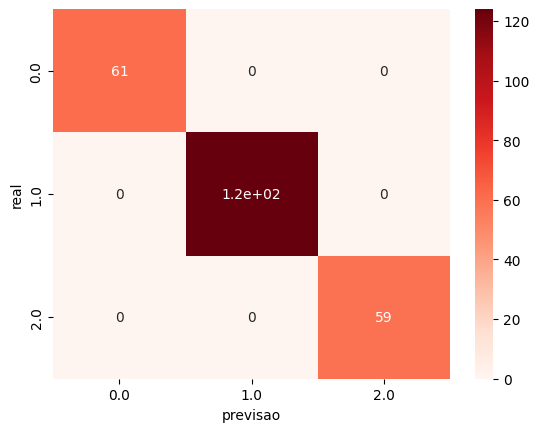

In [ ]:
# Matriz de Confusão Regressão Logística:
df_LR=pd.DataFrame(df_LR,columns=['real','previsao' ])
cf_matrix=pd.crosstab(df_LR['real'], df_LR['previsao'], rownames=['real'] , colnames=['previsao'])
sns.heatmap(cf_matrix, annot=True, cmap='Reds')

Pela Matriz de Confusão acima, a Regressão Logística está plenamente funcional, ou seja, previu todos os resultados corretamente.  61 resultados que foram empates, 120 resultados com vitória do time mandante e 59 resultados com vitória do time visitante. Não houve erros.

<Axes: xlabel='previsao', ylabel='real'>

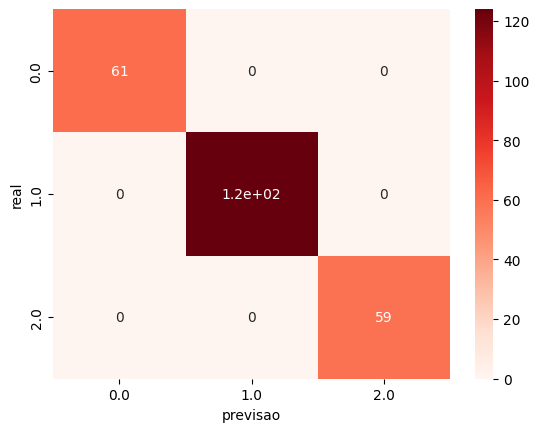

In [ ]:
# Matriz de Confusão SVM:
df_SVC=pd.DataFrame(df_SVC,columns=['real','previsao' ])
cf_matrix=pd.crosstab(df_SVC['real'], df_SVC['previsao'], rownames=['real'] , colnames=['previsao'])
sns.heatmap(cf_matrix, annot=True, cmap='Reds')

Idem à Regressão Logística. Ou seja, este modelo também está muito bem performado.

<Axes: xlabel='previsao', ylabel='real'>

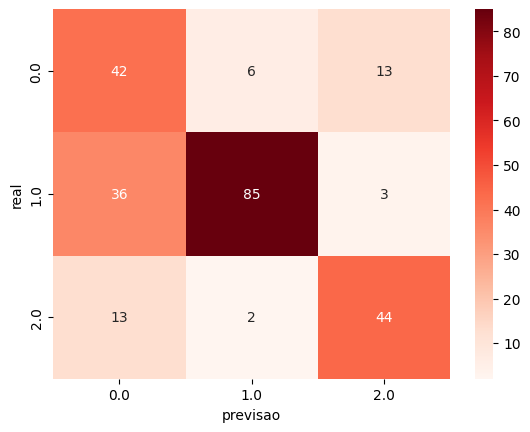

In [ ]:
# Matriz de Confusão Árvore de Decisão:
df=pd.DataFrame(df,columns=['real','previsao' ])
cf_matrix=pd.crosstab(df['real'], df['previsao'], rownames=['real'] , colnames=['previsao'])
sns.heatmap(cf_matrix, annot=True, cmap='Reds')

Já na Árvore de Decisão, percebemos que houve algumas predições que não foram corretas. Apesar de uma boa performance nas previsões, foi um pouco abaixo em relação ao treinamento e teste.

<Axes: xlabel='previsao', ylabel='real'>

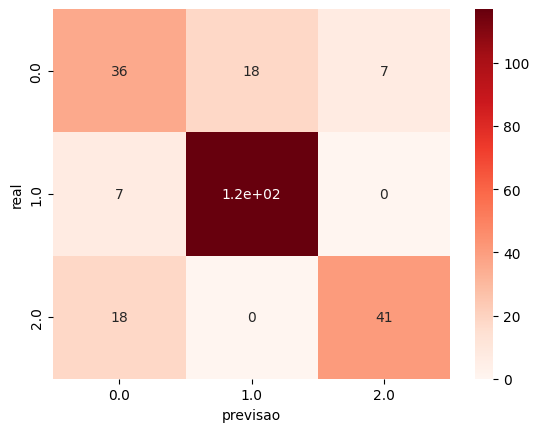

In [ ]:
# Matriz de Confusão Naive Bayes:
df_GaussianNB=pd.DataFrame(df_GaussianNB,columns=['real','previsao' ])
cf_matrix=pd.crosstab(df_GaussianNB['real'], df_GaussianNB['previsao'], rownames=['real'] , colnames=['previsao'])
sns.heatmap(cf_matrix, annot=True, cmap='Reds')

Já no Naive Bayes, também obtivemos algumas predições incorretas. No entanto, estão condizentes com o treinamento e teste realizado, além de uma boa performance no geral.

# **Conclusão:**

Analisando as matrizes plotadas acima, notamos o grande destaque da Regressão Logística e do SVM, cujas previsões foram acertadas à risca e estão bem aderentes. Quanto aos demais modelos, eles estão com uma porcentagem bastante aceitável de acertos, embora o modelo de Árvore de Decisão foi o que teve a performance mais baixa nas previsões.
Para fins de utilização de nosso projeto, dadas às características iniciais, seria melhor optar pela Regressão Logística ou SVM.
Contudo, o esporte, em si, é recheado de incertezas (a priori). Então, nada pode ser garantido. Este projeto teve o intuito de tentar eliminar um pouco essas incertezas para se ter maior probabilidade de acerto nas previsões de resultado. E acredito que o mesmo obteve êxito na sua proposta.
Lembrando sempre que fica a critério do usuário utilizá-lo para tentar melhorar as suas análises e apostas ou se apenas continua interagindo através do coração e emoção, o que também faz parte do contexto para quem é apaixonado pelo esporte.
